In [1]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime # Import the datetime module

fake = Faker()
np.random.seed(42)

# Define possible values
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Monitor', 'Keyboard', 'Mouse']
product_prices = {'Laptop': 800, 'Smartphone': 500, 'Tablet': 300, 'Headphones': 100, 'Monitor': 200, 'Keyboard': 50, 'Mouse': 30}

rows = []
for i in range(10000):
    product = np.random.choice(products)
    quantity = np.random.randint(1, 6)
    price = product_prices[product]
    # Convert date strings to datetime objects
    start_date_dt = datetime.strptime('2023-01-01', '%Y-%m-%d')
    end_date_dt = datetime.strptime('2023-12-31', '%Y-%m-%d')
    order_date = fake.date_between(start_date=start_date_dt, end_date=end_date_dt)
    customer = fake.name()
    rows.append([i+1, product, quantity, price, order_date, customer])

df = pd.DataFrame(rows, columns=['order_id', 'product', 'quantity', 'price', 'order_date', 'customer'])
df.to_csv('sales_data.csv', index=False)
df.head()

,order_id,product,quantity,price,order_date,customer
0,1,Mouse,4,30,2023-01-13,Pamela Bowers
1,2,Monitor,3,200,2023-08-11,Karen Meyer
2,3,Monitor,5,200,2023-01-08,Richard Garcia
3,4,Mouse,2,30,2023-10-16,Brian Garcia
4,5,Tablet,3,300,2023-08-25,Natalie Allison


In [4]:
import sqlite3

# Create database and table
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    order_date TEXT,
    customer TEXT
)
''')
conn.commit()

# Load data into the table
df.to_sql('sales', conn, if_exists='replace', index=False)


10000

In [5]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
summary_df = pd.read_sql_query(query, conn)
print(summary_df)


      product  total_qty  revenue
0      Laptop       4349  3479200
1  Smartphone       4361  2180500
2      Tablet       4129  1238700
3     Monitor       4317   863400
4  Headphones       4146   414600
5    Keyboard       4299   214950
6       Mouse       4444   133320


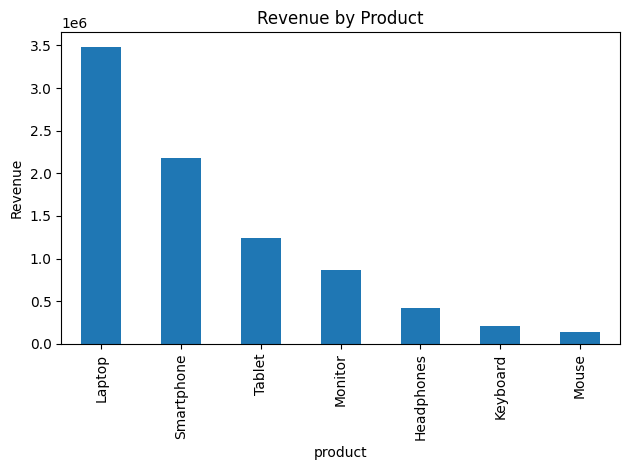

In [6]:
import matplotlib.pyplot as plt

summary_df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()
plt.show()
